In [1]:
import pandas as pd
import numpy as np
import os
os.chdir('/Users/taopeng/Documents/GIScience2023')
import matplotlib.pyplot as plt

#  1.Load Data

In [2]:
# load data
election = pd.read_csv('data/countypres_2000-2020.csv')
election

,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,AL GORE,DEMOCRAT,4942,17208,20220315,TOTAL
1,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,11993,17208,20220315,TOTAL
2,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,RALPH NADER,GREEN,160,17208,20220315,TOTAL
3,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,OTHER,OTHER,113,17208,20220315,TOTAL
4,2000,ALABAMA,AL,BALDWIN,1003.0,US PRESIDENT,AL GORE,DEMOCRAT,13997,56480,20220315,TOTAL
...,...,...,...,...,...,...,...,...,...,...,...,...
72612,2020,WYOMING,WY,WASHAKIE,56043.0,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,3245,4032,20220315,TOTAL
72613,2020,WYOMING,WY,WESTON,56045.0,US PRESIDENT,JOSEPH R BIDEN JR,DEMOCRAT,360,3560,20220315,TOTAL
72614,2020,WYOMING,WY,WESTON,56045.0,US PRESIDENT,JO JORGENSEN,LIBERTARIAN,46,3560,20220315,TOTAL
72615,2020,WYOMING,WY,WESTON,56045.0,US PRESIDENT,OTHER,OTHER,47,3560,20220315,TOTAL


# 2.Calculate Partisanship of each election

In [3]:
# define a function to calculate partisanship
def partisanship(df, year=None):
    geoid_diff = []
    df = df.dropna()
    for i in df['county_fips'].unique():
        df_tmp = df.loc[df['county_fips'] == i, ['county_fips', 'party', 'candidatevotes', 'totalvotes']]
        diff_vote = df_tmp[df_tmp.party == 'DEMOCRAT']['candidatevotes'].sum() - df_tmp[df_tmp.party == 'REPUBLICAN']['candidatevotes'].sum()
        diff = diff_vote/df_tmp['totalvotes'].tolist()[0]
        geoid_diff.append([i, diff])
        year = year
    partisanship_df = pd.DataFrame(data = geoid_diff, columns=['geoid', f"partisanship{year}"])
    return partisanship_df

In [4]:
p2000 = partisanship(election[election.year==2000], year=2000)
p2004 = partisanship(election[election.year==2004], year=2004)
p2008 = partisanship(election[election.year==2008], year=2008)
p2012 = partisanship(election[election.year==2012], year=2012)
p2016 = partisanship(election[election.year==2016], year=2016)
p2020 = partisanship(election[election.year==2020], year=2020)

/var/folders/6l/52l12h9916z4y7k0qy4pfg0c0000gn/T/ipykernel_32863/3271870629.py:8: RuntimeWarning: invalid value encountered in long_scalars
  diff = diff_vote/df_tmp['totalvotes'].tolist()[0]
/var/folders/6l/52l12h9916z4y7k0qy4pfg0c0000gn/T/ipykernel_32863/3271870629.py:8: RuntimeWarning: invalid value encountered in long_scalars
  diff = diff_vote/df_tmp['totalvotes'].tolist()[0]
/var/folders/6l/52l12h9916z4y7k0qy4pfg0c0000gn/T/ipykernel_32863/3271870629.py:8: RuntimeWarning: invalid value encountered in long_scalars
  diff = diff_vote/df_tmp['totalvotes'].tolist()[0]
/var/folders/6l/52l12h9916z4y7k0qy4pfg0c0000gn/T/ipykernel_32863/3271870629.py:8: RuntimeWarning: invalid value encountered in long_scalars
  diff = diff_vote/df_tmp['totalvotes'].tolist()[0]
/var/folders/6l/52l12h9916z4y7k0qy4pfg0c0000gn/T/ipykernel_32863/3271870629.py:8: RuntimeWarning: invalid value encountered in long_scalars
  diff = diff_vote/df_tmp['totalvotes'].tolist()[0]
/var/folders/6l/52l12h9916z4y7k0qy4pfg0c

In [5]:
# merge the result of 6 elections
election_df = [p2004, p2008, p2012, p2016, p2020]

result = p2000

for i in election_df:
    result = pd.merge(result, i, left_on='geoid', right_on = 'geoid', how ='left')

result = result.dropna()

In [6]:
# define a function to calculate partisanship index and parti, based on different number of election result

def party_res(df, ele_year=['partisanship2016', 'partisanship2020'], name1='party_idx_16-20', name2 = 'party_16-20'):
    df_tmp = df
    df_tmp[name2] = None
    df_tmp[name1] = df_tmp[ele_year].mean(axis = 1) # average of n elections
    for i in df_tmp.geoid.unique():
        # 2000-2020 partisanship for county i
        vals = df_tmp[df_tmp.geoid == i].loc[:, ele_year].values

        # red county
        if all([val < 0 for val in vals[0].tolist()]) is True: # all the partisanship index of the 6 elections
            party = 'red'
        # blue
        elif all([val > 0 for val in vals[0].tolist()]) is True:
            party = 'blue'
        # purple
        else:
            party = 'purple'
        
        df_tmp.loc[df_tmp.geoid == i, name2] = party
    
    return df_tmp
    

In [7]:
#result.to_csv('Data/partisanship_2000_2020.csv', index= False)
party_res_2000_2020 = party_res(result, ele_year=['partisanship2000', 'partisanship2004', 'partisanship2008', 'partisanship2012', 'partisanship2016', 'partisanship2020'], name1='party_idx_00-20', name2 = 'party_00-20')
party_res_2004_2020 = party_res(result, ele_year=['partisanship2004', 'partisanship2008', 'partisanship2012', 'partisanship2016', 'partisanship2020'], name1='party_idx_04-20', name2 = 'party_04-20')
party_res_2008_2020 = party_res(result, ele_year=['partisanship2008', 'partisanship2012', 'partisanship2016', 'partisanship2020'], name1='party_idx_08-20', name2 = 'party_08-20')
party_res_2012_2020 = party_res(result, ele_year=['partisanship2012', 'partisanship2016', 'partisanship2020'], name1='party_idx_12-20', name2 = 'party_12-20')
party_res_2016_2020 = party_res(result, ele_year=['partisanship2016', 'partisanship2020'], name1='party_idx_16-20', name2 = 'party_16-20')
# 

In [8]:
result.to_csv('Data/partisanship_2000_2020.csv', index= False)

# 3.Compare the result of different elections

In [9]:
# get the counties to analyze
c2020 = pd.read_csv('Data/county_flows_2020.csv')
c2020 = c2020[['geoid', 'date', 'pop_totalflows']]

# delete counties not in the US continent
c2020 = c2020[c2020.geoid//1000 != 15] # Hawaii
c2020 = c2020[c2020.geoid//1000 != 2] # Alaska
c2020 = c2020[c2020.geoid//1000 != 72] # Puerto Rico

# c2020.groupby(by = 'geoid').count().reset_index().drop_duplicates(subset='pop_totalflows')
# 8053 16003 30069 30103 do not have data of every day
c2020 = c2020[c2020.geoid != 16033]
c2020 = c2020[c2020.geoid != 8053]
c2020 = c2020[c2020.geoid != 30069]
c2020 = c2020[c2020.geoid != 30103]


In [10]:
counties = pd.DataFrame(c2020.geoid.unique(),columns=['geoid'])
partisanship = pd.read_csv('Data/partisanship_2000_2020.csv')
partisanship = pd.merge(counties, result, left_on = 'geoid', right_on = 'geoid', how ='inner')

Text(0.5, 1.0, 'counties, partisanship idx not always > 0, or not alwas < 0')

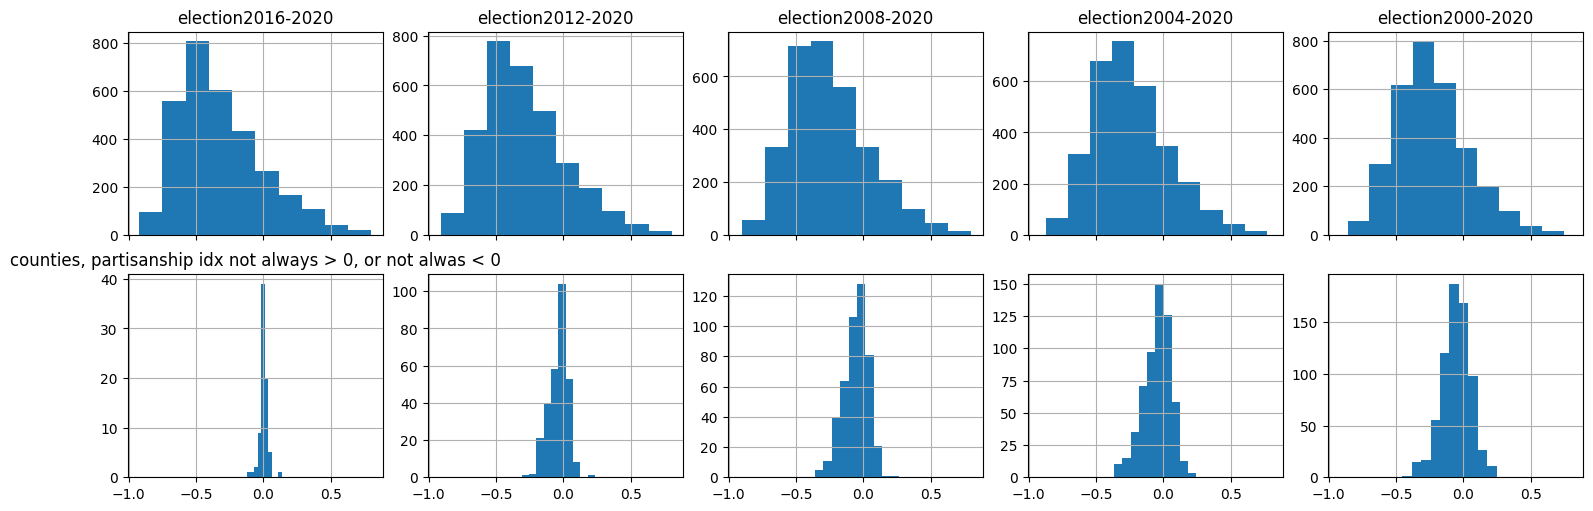

In [11]:
partisanship

fig,ax = plt.subplots(2,5,figsize = (15,5), constrained_layout = True, sharex=True)

partisanship['party_idx_16-20'].hist(ax=ax[0,0])
partisanship[partisanship['party_16-20'] == 'purple']['party_idx_16-20'].hist(ax=ax[1,0])

partisanship['party_idx_12-20'].hist(ax=ax[0,1])
partisanship[partisanship['party_12-20'] == 'purple']['party_idx_12-20'].hist(ax=ax[1,1])

partisanship['party_idx_08-20'].hist(ax=ax[0,2])
partisanship[partisanship['party_08-20'] == 'purple']['party_idx_08-20'].hist(ax=ax[1,2])

partisanship['party_idx_04-20'].hist(ax=ax[0,3])
partisanship[partisanship['party_04-20'] == 'purple']['party_idx_04-20'].hist(ax=ax[1,3])

partisanship['party_idx_00-20'].hist(ax=ax[0,4])
partisanship[partisanship['party_00-20'] == 'purple']['party_idx_00-20'].hist(ax=ax[1,4])

ax[0,0].set_title('election2016-2020')
ax[0,1].set_title('election2012-2020')
ax[0,2].set_title('election2008-2020')
ax[0,3].set_title('election2004-2020')
ax[0,4].set_title('election2000-2020')

ax[1,0].set_title('counties, partisanship idx not always > 0, or not alwas < 0')
# ax[1,1].set_title('counties shuffled')
# ax[1,2].set_title('counties shuffled')
# ax[1,3].set_title('counties shuffled')
# ax[1,4].set_title('counties shuffled')